We are going to practise with Basic Linear Regression by using Advertising Dataset

In [1]:
# Gerekli kütüphaneleri yükleyelim
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Veriyi yükleyelim
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Veriyi inceleyelim
print(data.head())


   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [3]:
# I will explore the data to see what is inside it
print(data.info())

#I will get summarize of data
print(data.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB
None
            count      mean        std  min     25%     50%      75%    max
Unnamed: 0  200.0  100.5000  57.879185  1.0  50.750  100.50  150.250  200.0
TV          200.0  147.0425  85.854236  0.7  74.375  149.75  218.825  296.4
radio       200.0   23.2640  14.846809  0.0   9.975   22.90   36.525   49.6
newspaper   200.0   30.5540  21.778621  0.3  12.750   25.75   45.100  114.0
sales       200.0   14.0225   5.217457  1.6  10.375   12.90   17.400   27.0


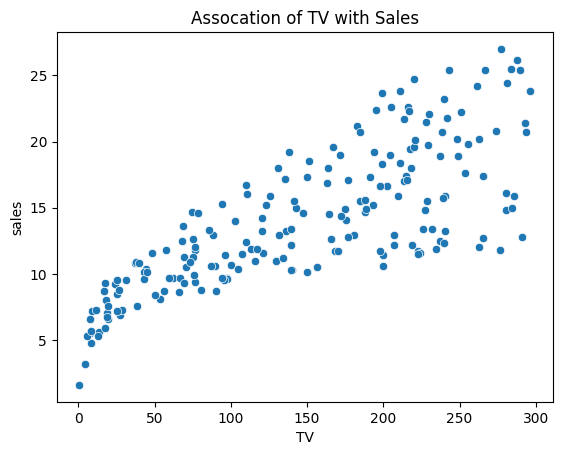

In [4]:
# I will assoicate TV with sales.

sns.scatterplot(data=data, x="TV", y="sales")
plt.title("Assocation of TV with Sales")
plt.show()

In [6]:
# I'm going to split tje data into training and test sets
X=data[["TV"]]
y=data['sales']

#Train And Test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=42 )

In [7]:
#Let's create a model related to data
model=LinearRegression()
model.fit(X_train,y_train)

#Parameters of Model
print("Eğim(m)",model.coef_[0])
print("Y Kesme Noktası (b):",model.intercept_)

Eğim(m) 0.046529733705443346
Y Kesme Noktası (b): 7.119638430592953


In [8]:
#Tahminleme
y_pred=model.predict(X_test)

#Let's evaluate the model
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print("Mean Squared Error:",mse)
print("R2 Score:",r2)

Mean Squared Error: 10.204654118800956
R2 Score: 0.6766954295627076


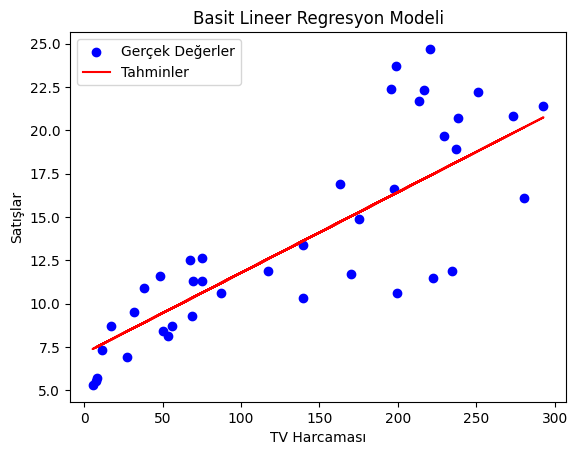

In [9]:
# Gerçek ve tahmin edilen değerler
plt.scatter(X_test, y_test, color='blue', label='Gerçek Değerler')
plt.plot(X_test, y_pred, color='red', label='Tahminler')
plt.xlabel("TV Harcaması")
plt.ylabel("Satışlar")
plt.title("Basit Lineer Regresyon Modeli")
plt.legend()
plt.show()


In [11]:
from os import pread
# I predict a new data
new_data = [[350]] #Tv Harcaması 150 birim
preadition=model.predict(new_data)
print("Tahmin edilen satış miktarı:",preadition)

Tahmin edilen satış miktarı: [23.40504523]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
